In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. IDEIA GERAL 

A ideia do projeto será comparar como o número de features (high ou low dimensions) afeta a classificação de dados Windows Executables Programs como vírus ou não. No caso, o SET escolhido tem diversas informaçoes sobre cada programa:
     Temos: 
            1. API_Functions => Descreve se uma dada API function é ou não usada ao longo do programa
            2. DLLS => Se dado programa importa ou não uma certa DLL (HIGH DIM => 630)
            3. PE_Section => Mapeia o conteúdo completo nos detalhes do executável (como se fosse o conteúdo factual do livro) (LOW DIM)
            4. PE_HEader => Mapeia o geral de um programa (como se fosse o sumário de um livro) (LOW DIM)
            
Para facilitar o projeto, vamos utilizar as DLLs (menos features e boa capacidade descritiva) e Header (menos complexa, mais simples de tratar) e comparar como 2 diferentes classificadores se comportam em um SET com mais/menos features.

# 2. Descrição e Análise Exploratória dos Dados

Aqui iremos visualizar as estatisticas de cada base como: médias, stds, quartis, barplots, CDFs entre outros.

### 2.1 Descrição genérica dos dados

In [4]:
DLLs_filename = 'dataset/DLLs_Binary_imported.csv'
PE_header_filename = 'dataset/PE_header_binary_df_imported.csv'
feature = 'isMalware'

DLL_df = pd.read_csv(DLLs_filename, index_col=0)
PE_header_df = pd.read_csv(PE_header_filename, index_col=0)

print("======= DISPLAYING DLL DATA =======")
print(DLL_df.describe())
print("======= DISPLAYING HEADER DATA =======")
print(PE_header_df.describe())

======= DISPLAYING DLL DATA =======
               Type  advapi32.dll  kernel32.dll    vspmsg.dll     ole32.dll  \
count  29498.000000  29498.000000  29498.000000  29498.000000  29498.000000   
mean       3.145874      0.224591      0.494881      0.000068      0.105092   
std        1.806477      0.417320      0.499982      0.008234      0.306677   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        5.000000      0.000000      1.000000      0.000000      0.000000   
max        6.000000      1.000000      1.000000      1.000000      1.000000   

       oleaut32.dll     psapi.dll  setupapi.dll   shlwapi.dll       pdh.dll  \
count  29498.000000  29498.000000  29498.000000  29498.000000  29498.000000   
mean       0.105838      0.009662      0.002034      0.045495      0.001187   
std        0.30

### 2.2 Visualização das DLLs mais utilizadas no SET

Nesse segmento faremos uma analise exploratória especifica sobre o set das DLLs. Observando quais são mais comuns dado que o set contém somente programas benignos ou malwares. Além disso, é feito uma analise de heatmap para mapear a dispersão desses conjuntos com o TODO, definindo assim, DLLs centrais que podem ser importantes para ambos tipos de programas independente de serem ou não vírus.


In [3]:
# SET de funções auxiliares que serão utilizadas ao longo do projeto

# ---- FUNÇÃO PARA BARRAS ----
def plot_bar(freq_series, title, x_label, y_label, path_to_save):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freq_series.values, y=freq_series.index)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.tight_layout()

    if (path_to_save):
        plt.savefig(path_to_save, bbox_inches='tight')

    plt.show()



Top 20 DLLs mais usadas em todo SET:
kernel32.dll    14598
mscoree.dll     12374
user32.dll      11160
gdi32.dll        7678
advapi32.dll     6625
comctl32.dll     3720
shell32.dll      3295
msvbvm60.dll     3140
oleaut32.dll     3122
ole32.dll        3100
msvcrt.dll       2060
version.dll      1766
winmm.dll        1702
comdlg32.dll     1517
shlwapi.dll      1342
mfc42.dll        1039
msimg32.dll       955
winhttp.dll       787
winspool.drv      668
gdiplus.dll       656
dtype: int64


Top 20 DLLs mais usadas nos programas maliciosos:
kernel32.dll    13792
mscoree.dll     11339
user32.dll      10829
gdi32.dll        7567
advapi32.dll     6345
comctl32.dll     3625
msvbvm60.dll     3139
shell32.dll      3121
oleaut32.dll     2985
ole32.dll        2913
version.dll      1692
winmm.dll        1691
msvcrt.dll       1598
comdlg32.dll     1469
shlwapi.dll      1247
mfc42.dll        1039
msimg32.dll       939
winhttp.dll       783
winspool.drv      651
gdiplus.dll       633
dtype: int64


T

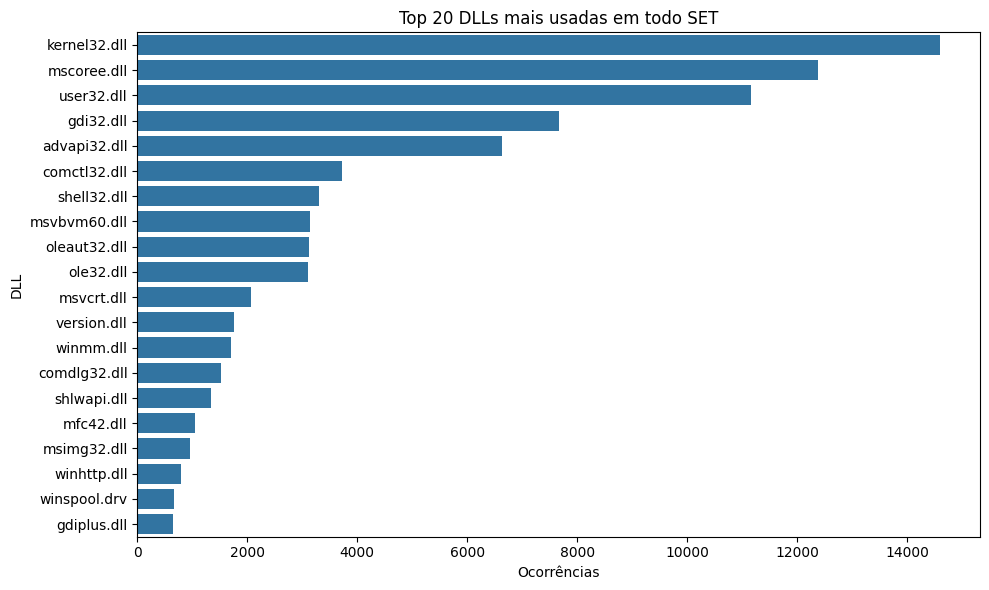

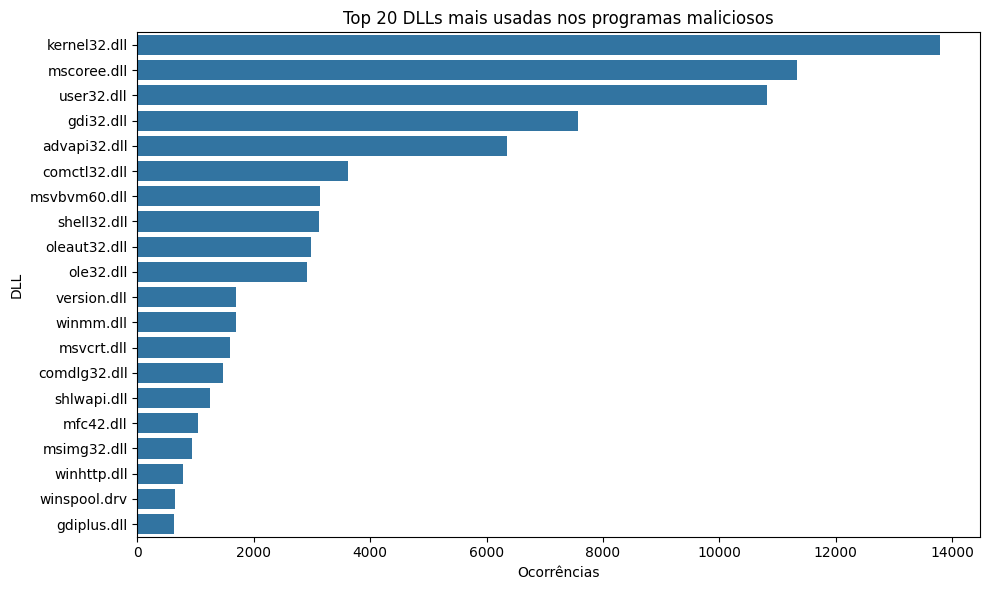

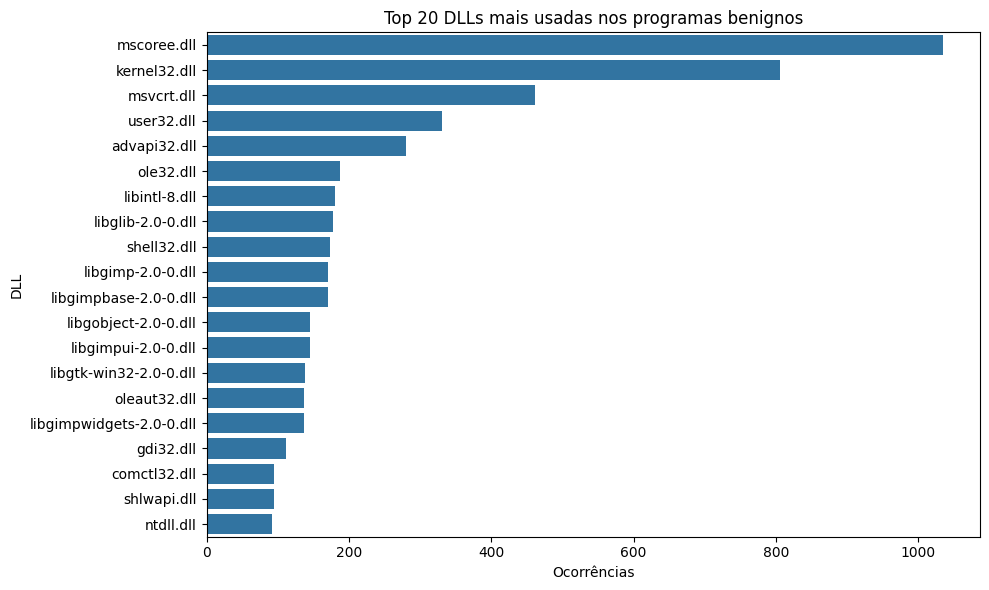

In [4]:
y = DLL_df[feature]
X_dll = DLL_df.drop(columns=["SHA256", "Type", feature])

# frequência geral
dll_freq = X_dll.sum().sort_values(ascending=False)

print("\n\nTop 20 DLLs mais usadas em todo SET:")
print(dll_freq.head(20))

# frequência separada por classe
malware = DLL_df[DLL_df[feature] != 0]
benign = DLL_df[DLL_df[feature] == 0]

dll_freq_mal = malware.drop(columns=["SHA256", "Type", feature]).sum().sort_values(ascending=False)
dll_freq_ben = benign.drop(columns=["SHA256", "Type", feature]).sum().sort_values(ascending=False)

print("\n\nTop 20 DLLs mais usadas nos programas maliciosos:")
print(dll_freq_mal.head(20))
print("\n\nTop 20 DLLs mais usadas nos programas benignos:")
print(dll_freq_ben.head(20))

plot_bar(dll_freq.head(20), "Top 20 DLLs mais usadas em todo SET", "Ocorrências", "DLL", "figs/most_freq_whole_set.pdf")
plot_bar(dll_freq_mal.head(20), "Top 20 DLLs mais usadas nos programas maliciosos", "Ocorrências", "DLL", "figs/most_freq_malware_set.pdf")
plot_bar(dll_freq_ben.head(20), "Top 20 DLLs mais usadas nos programas benignos", "Ocorrências", "DLL", "figs/most_freq_benign_set.pdf")


### 2.3 Visualização de dispersão dos dados

kernel32.dll: 53.33%  —  16 vezes
mscoree.dll: 40.0%  —  12 vezes
user32.dll: 40.0%  —  12 vezes
gdi32.dll: 33.33%  —  10 vezes
advapi32.dll: 23.33%  —  7 vezes
comctl32.dll: 16.67%  —  5 vezes
shell32.dll: 13.33%  —  4 vezes
msvbvm60.dll: 6.67%  —  2 vezes
oleaut32.dll: 13.33%  —  4 vezes
ole32.dll: 20.0%  —  6 vezes
msvcrt.dll: 3.33%  —  1 vezes
version.dll: 6.67%  —  2 vezes
winmm.dll: 10.0%  —  3 vezes
comdlg32.dll: 20.0%  —  6 vezes
shlwapi.dll: 16.67%  —  5 vezes
mfc42.dll: 3.33%  —  1 vezes
msimg32.dll: 3.33%  —  1 vezes
winhttp.dll: 3.33%  —  1 vezes
winspool.drv: 6.67%  —  2 vezes
gdiplus.dll: 3.33%  —  1 vezes


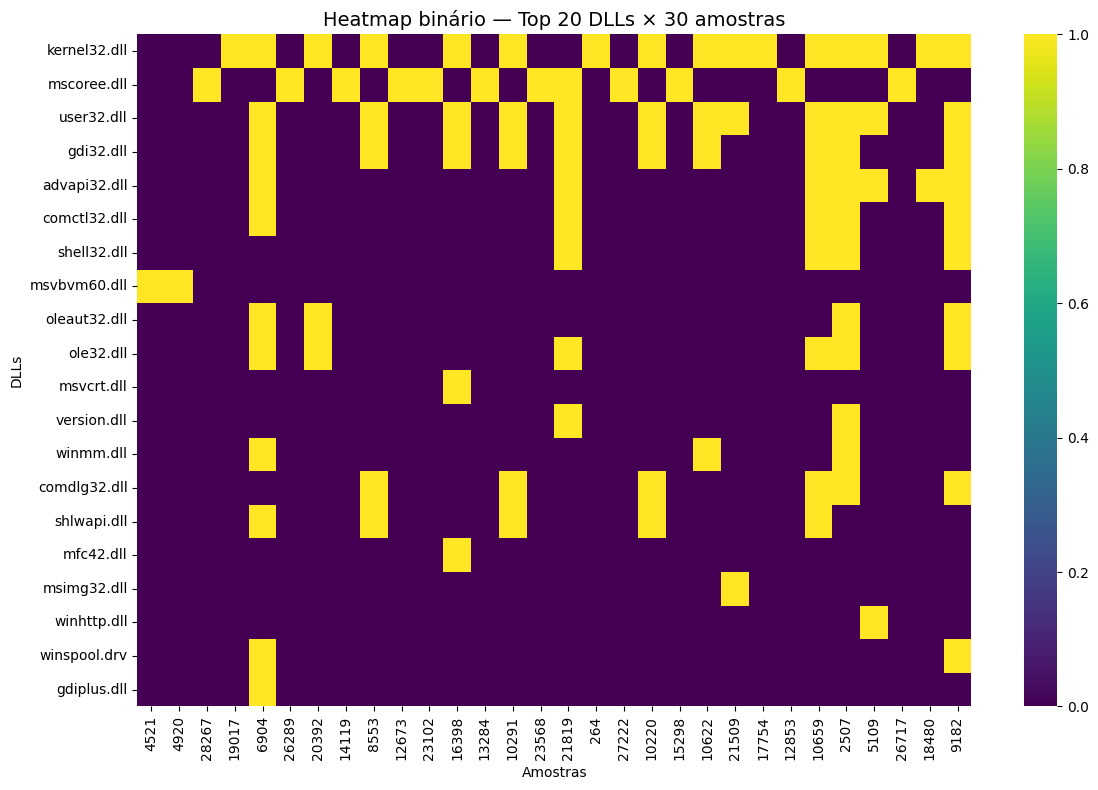

In [7]:
top_20 = dll_freq.head(20).index
sample_df = X_dll[top_20].sample(30, random_state=43)

freq = sample_df.sum()                # número de imports por DLL
percent = (freq / len(sample_df)) * 100

dll_stats = pd.DataFrame({
    "Frequência (vezes)": freq,
    "Percentual (%)": percent.round(2)
})

for dll, row in dll_stats.iterrows():
    print(f"{dll}: {row['Percentual (%)']}%  —  {int(row['Frequência (vezes)'])} vezes")


plt.figure(figsize=(12, 8))
sns.heatmap(sample_df.T, cmap="viridis", cbar=True)
plt.title("Heatmap binário — Top 20 DLLs × 30 amostras", fontsize=14)
plt.xlabel("Amostras")
plt.ylabel("DLLs")
plt.tight_layout()
plt.show()

Os resultados mostram que, mesmo dentro de um conjunto pequeno e aleatório de 30 executáveis, algumas DLLs aparecem com frequência muito maior do que outras. DLLs essenciais do Windows, como kernel32.dll, mscoree.dll, user32.dll e gdi32.dll, aparecem em mais de 30% das amostras, indicando funções básicas utilizadas pela maioria dos programas.

Por outro lado, a maioria das demais DLLs aparece em menos de 20% das amostras — algumas apenas uma vez — reforçando o caráter altamente esparso e variável desse tipo de feature. Isso confirma que os padrões de DLL importadas são muito diferentes entre os executáveis, o que ajuda a caracterizar o conjunto como high-dimensional e heterogêneo, contendo tanto DLLs comuns quanto DLLs raras que podem ser  mais discriminativas. 

NotImplementedError: Bivariate ECDF plots are not implemented

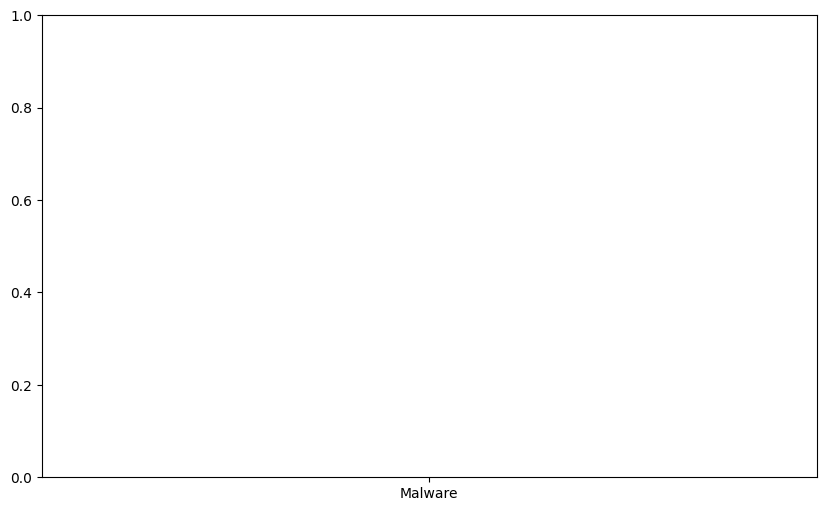

In [10]:
DLL_df = pd.read_csv(DLLs_filename, index_col=0)

malware = DLL_df[DLL_df[feature] > 0].drop(columns=['SHA256', 'Type', feature])
benign = DLL_df[DLL_df[feature] == 0].drop(columns=['SHA256', 'Type', feature])
X_dll = DLL_df.drop(columns=['SHA256', 'Type', feature])

dll_count_all = X_dll.sum(axis=1)
dll_count_mal = malware.sum(axis=1)
dll_count_ben = benign.sum(axis=1)


# sparsity = % de zeros na matriz total
total_values = X_dll.shape[0] * X_dll.shape[1]
zeros = (X_dll == 0).sum().sum()
sparsity = zeros / total_values * 100

box_df = pd.DataFrame({
    "DLLs_importadas": pd.concat([dll_count_mal, dll_count_ben], axis=0).values,
    "Classe": ["Malware"]*len(dll_count_mal) + ["Benigno"]*len(dll_count_ben)
})


plt.figure(figsize=(10,6))
sns.ecdfplot(data=box_df, x="DLLs_importadas", hue="Classe")
plt.title("Distribuição da quantidade de DLLs importadas por executável (Geral)")
plt.xlabel("Número de DLLs importadas")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# ====================
# GRÁFICO 2 — BOXPlot (malware vs benigno)
# ====================

box_df = pd.DataFrame({
    "DLLs_importadas": dll_count_all,
    "Classe": dll_count_all
})

plt.figure(figsize=(8,6))
sns.boxplot(data=box_df, x="Classe", y="DLLs_importadas")
plt.title("Comparação do número de DLLs importadas — Malware vs Benigno")
plt.ylabel("Quantidade de DLLs importadas")
plt.tight_layout()
plt.show()

# Resultado de inferência
Dado os gráficos acima podemos inferir que os programas de forma geral importam poucas DLLs. Isso pode ser percebido tanto pelo BarPlot quanto pela CDF acima;